In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

filename = '../Results/L1 2.5 nM'#'salvaged_RC_data.csv'#'dataset_072522.csv'
files = ["L1 2.5 nM","L1 5nM","L1 10nM"]

#files = ["L3","L4 5nM","L4 10nM"]
files = ["L1 5nM", "L2 5 nM", "L4 5nM.csv"]
#files = ["L1 2.5 nM mixing ","L1 5 nM mixing","L1 10 nM mixing"]
#files = ["L2 2.5nM","L2 5 nM","L2 10nM"]
files_path = [f'../Results/{file}' for file in files]
df_exp = [pd.read_csv(file) for file in files_path]

label="Labels"
features=features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
   'eccentricity'
         ]


In [2]:
print("DATA SUMMARY")
for label in ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]:
    print(f'For label {label}...')
    for df,file in list(zip(df_exp,files)):
        print(f'{file} has {len(df[df["Labels"] == label])}')

DATA SUMMARY
For label Crystal...
L1 5nM has 122
L2 5 nM has 454
L4 5nM.csv has 865
For label Multiple Crystal...
L1 5nM has 2
L2 5 nM has 122
L4 5nM.csv has 398
For label Incomplete...
L1 5nM has 203
L2 5 nM has 102
L4 5nM.csv has 501
For label Poorly Segmented...
L1 5nM has 20
L2 5 nM has 58
L4 5nM.csv has 285


/tmp/ipykernel_59953/1148930617.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


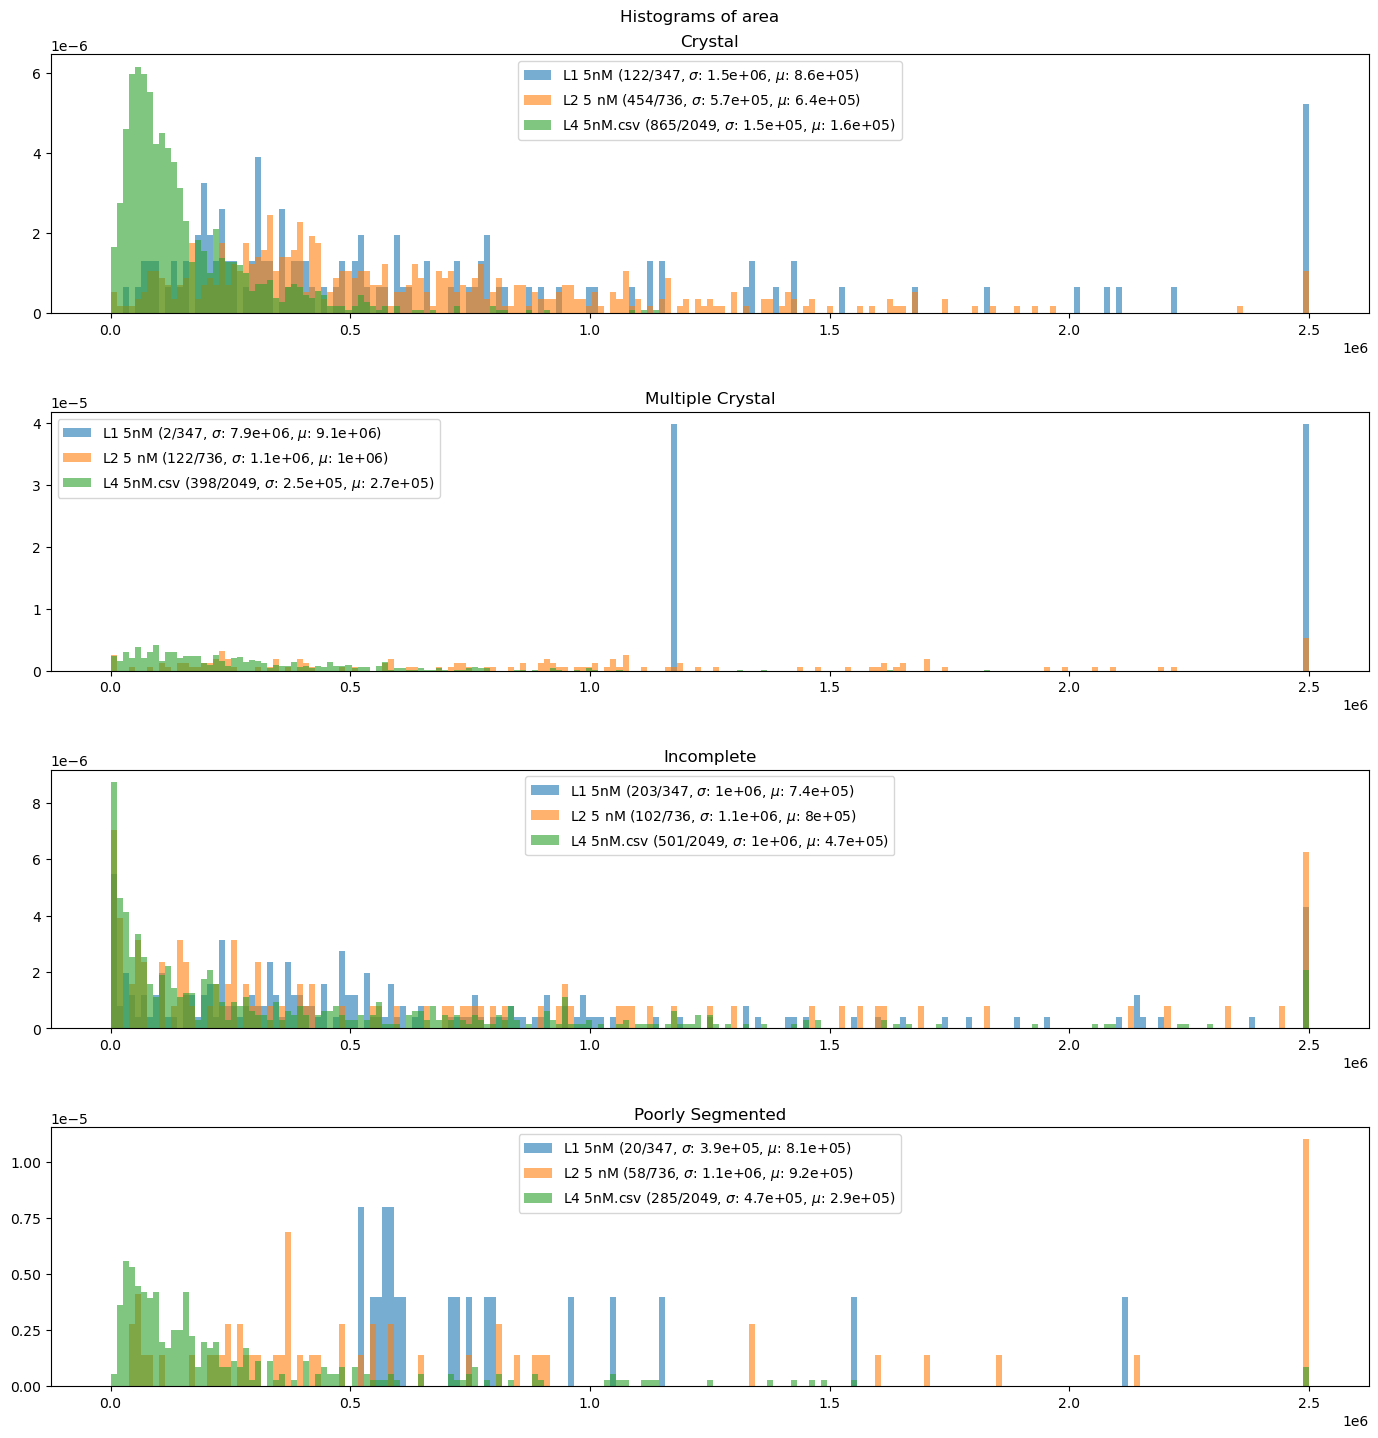

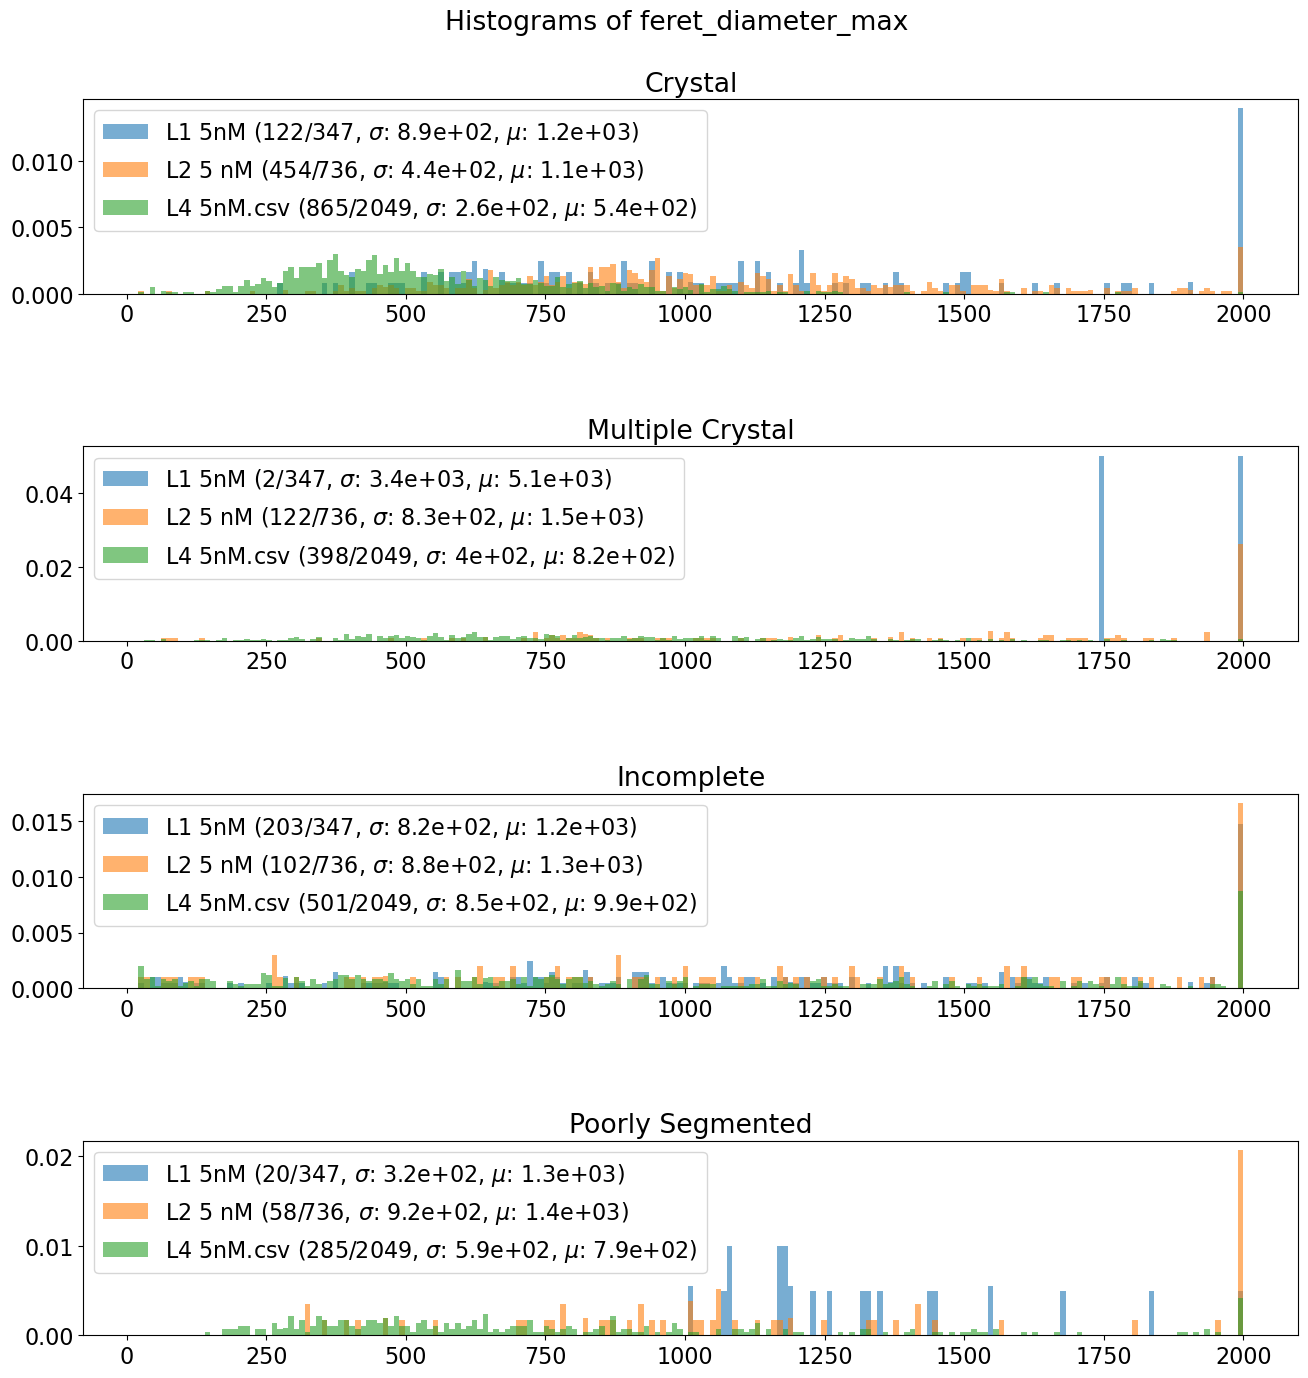

In [3]:
histogram_features = ['area','feret_diameter_max']

for histogram_feature in histogram_features:
    maxed = 2.50*10**6 if histogram_feature == 'area' else 2000
    fig, ax = plt.subplots(4, 1,figsize = (15, 15))
    fig.tight_layout(pad=5.0)
    fig.suptitle(f'Histograms of {histogram_feature}')
    class_list = ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]
    histogram_min = min([min(df[histogram_feature]) for df in df_exp])
    histogram_max = max([max(df[histogram_feature]) for df in df_exp])
    histogram_bins = np.round(np.linspace(histogram_min,maxed,200))
    #histogram_bins = np.append(histogram_bins,histogram_max)
    #histogram_bins = histogram_bins[1:].astype('str')
    #histogram_bins[-1] += '+'
    #print(histogram_bins)
    for ii in np.arange(len(class_list)):
        for df,file in list(zip(df_exp,files)):
            sub_df = df[df["Labels"] == class_list[ii]]
            x_data = sub_df[histogram_feature]
            counts = len(x_data)
            total_counts = len(df)
            sigma = np.std(x_data)
            mu = np.mean(x_data)
            ax[ii].hist(np.clip(x_data,histogram_bins[0],histogram_bins[-1]),\
                        alpha=0.6,label=f'{file} ({counts}/{total_counts}, $\sigma$: {sigma:.2}, $\mu$: {mu:.2})'\
                        ,bins=histogram_bins,density=True)
        ax[ii].title.set_text(class_list[ii])
        ax[ii].legend()
        
        #xlabels = histogram_bins[1:].astype(str)
        #xlabels[-1] += '+'

        #N_labels = len(xlabels)
        #fig.xlim([0, maxed])
        #ax[ii].xticks(25 * np.arange(N_labels) + 12.5)
        #ax[ii].set_xticklabels(xlabels)
    plt.rcParams.update({'font.size': 16})
    fig.show()

/tmp/ipykernel_59953/2746567114.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


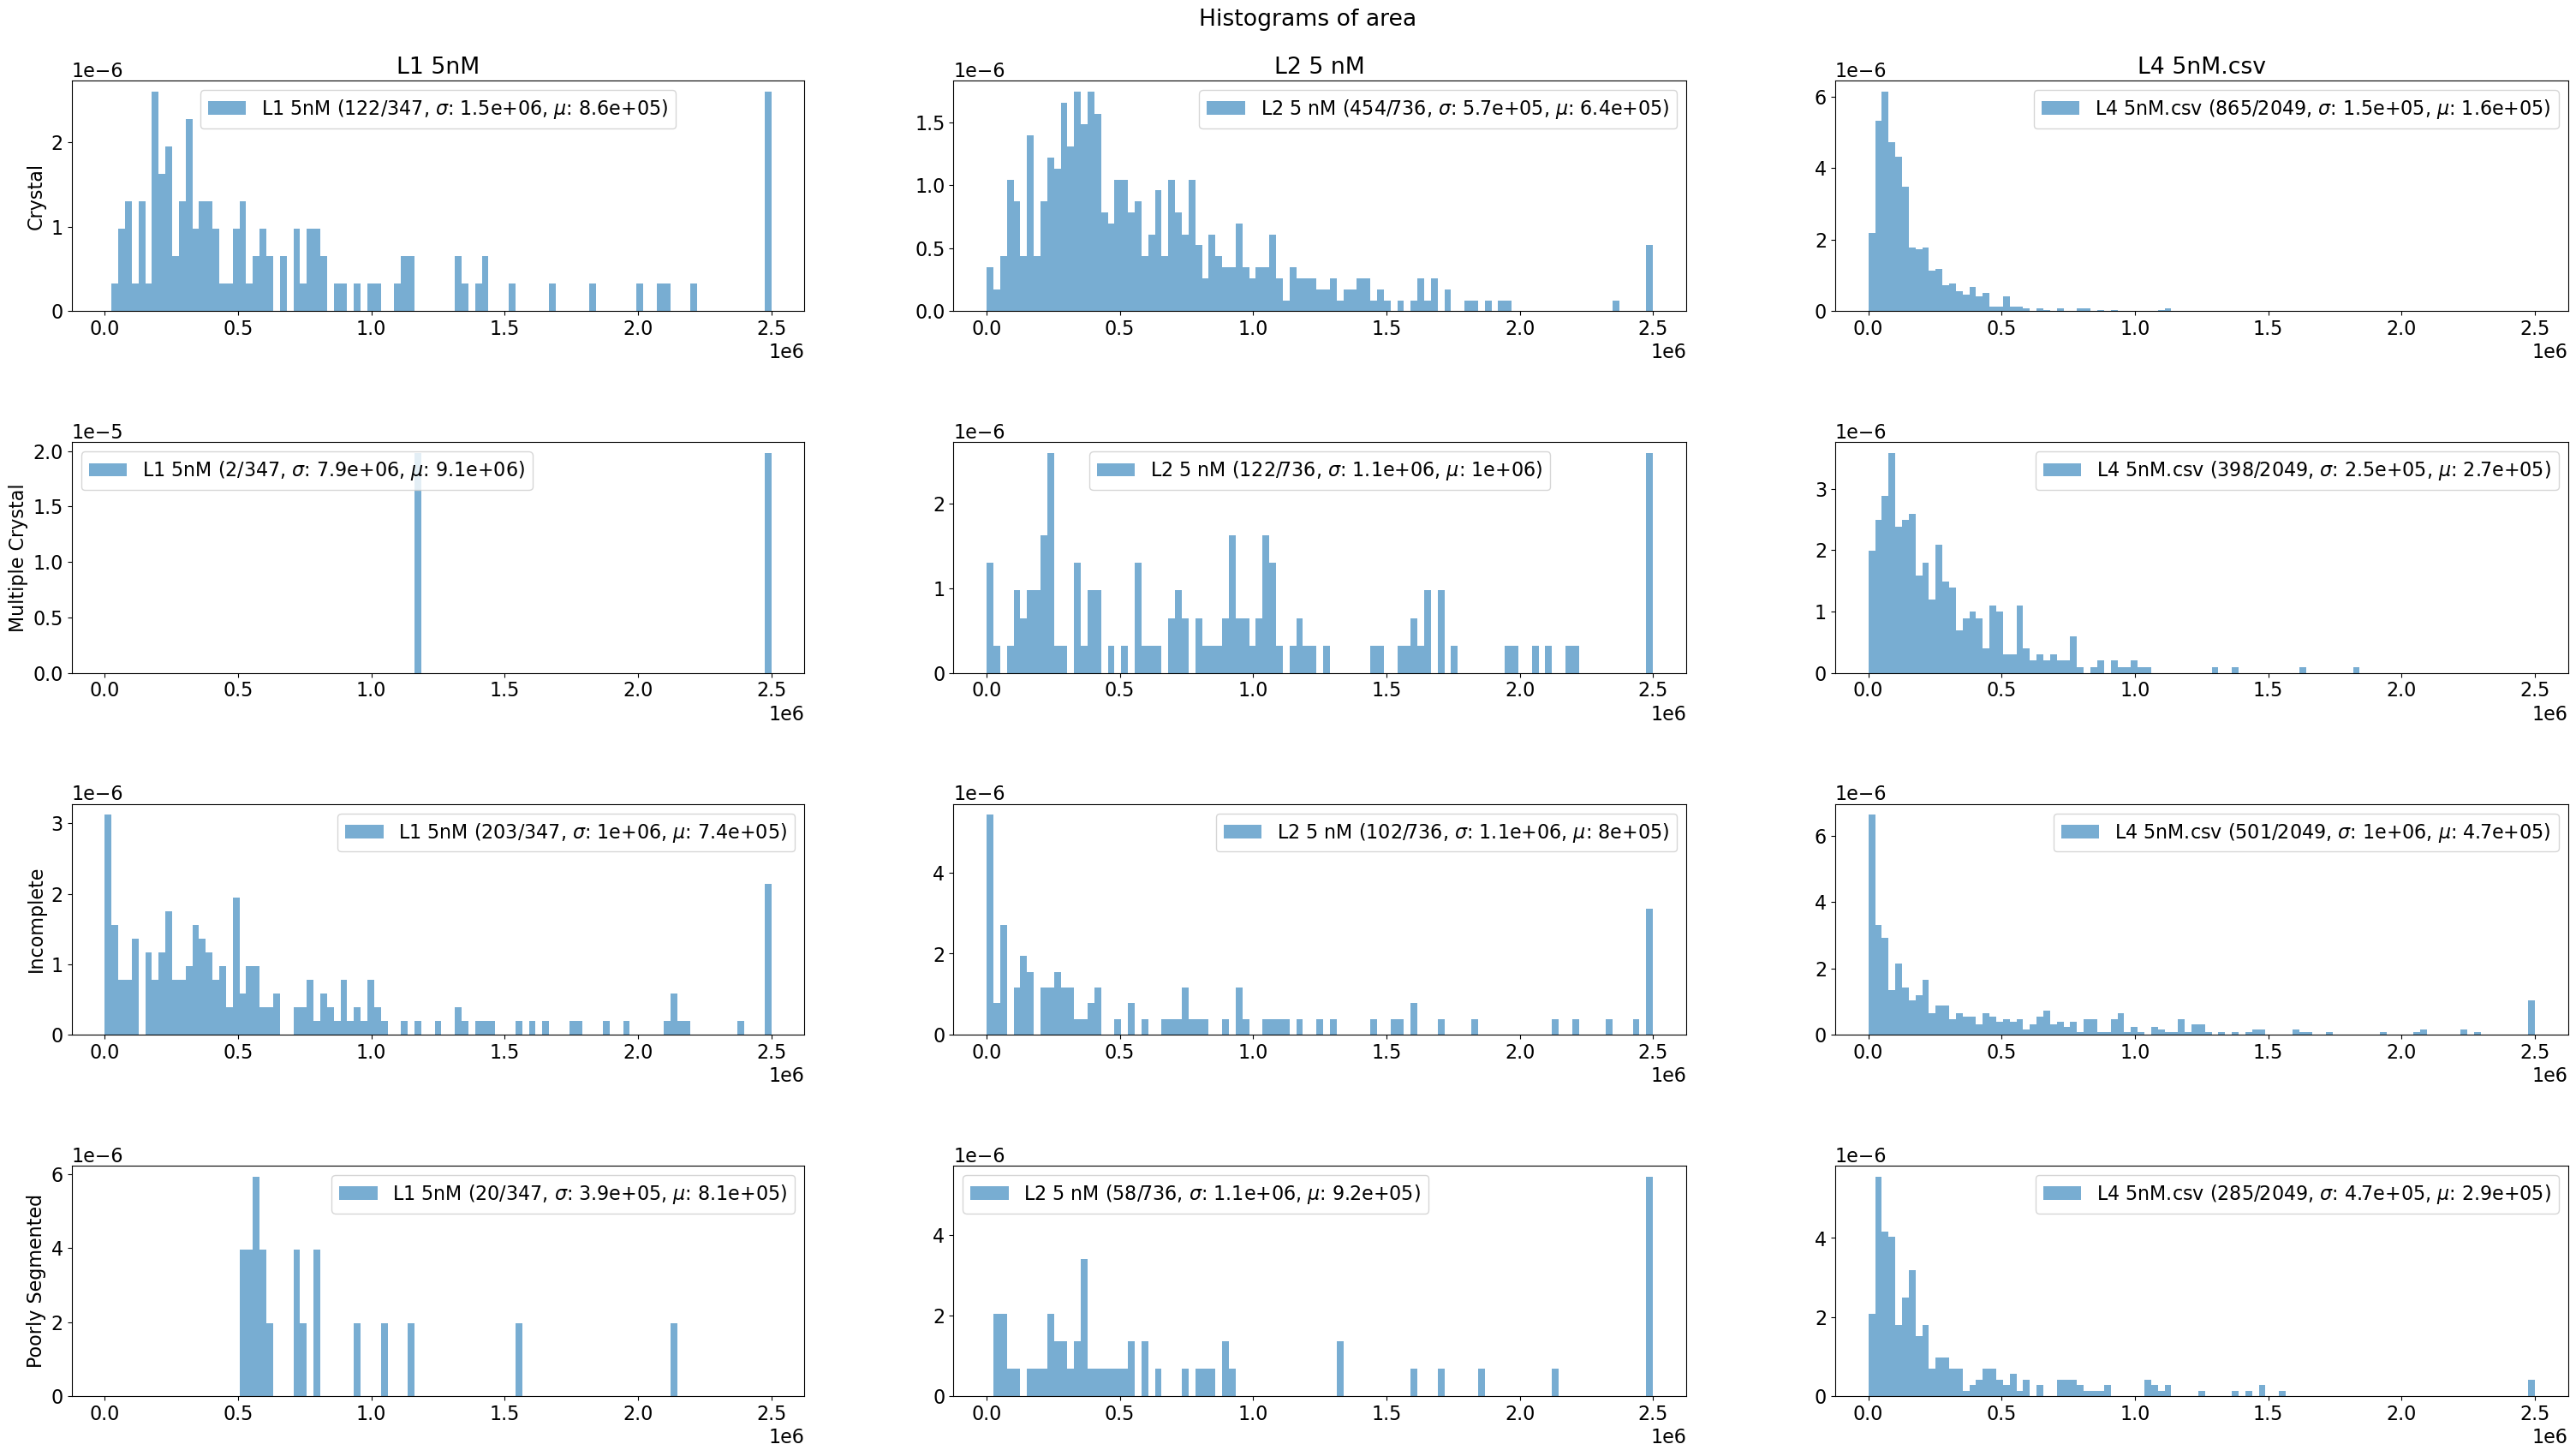

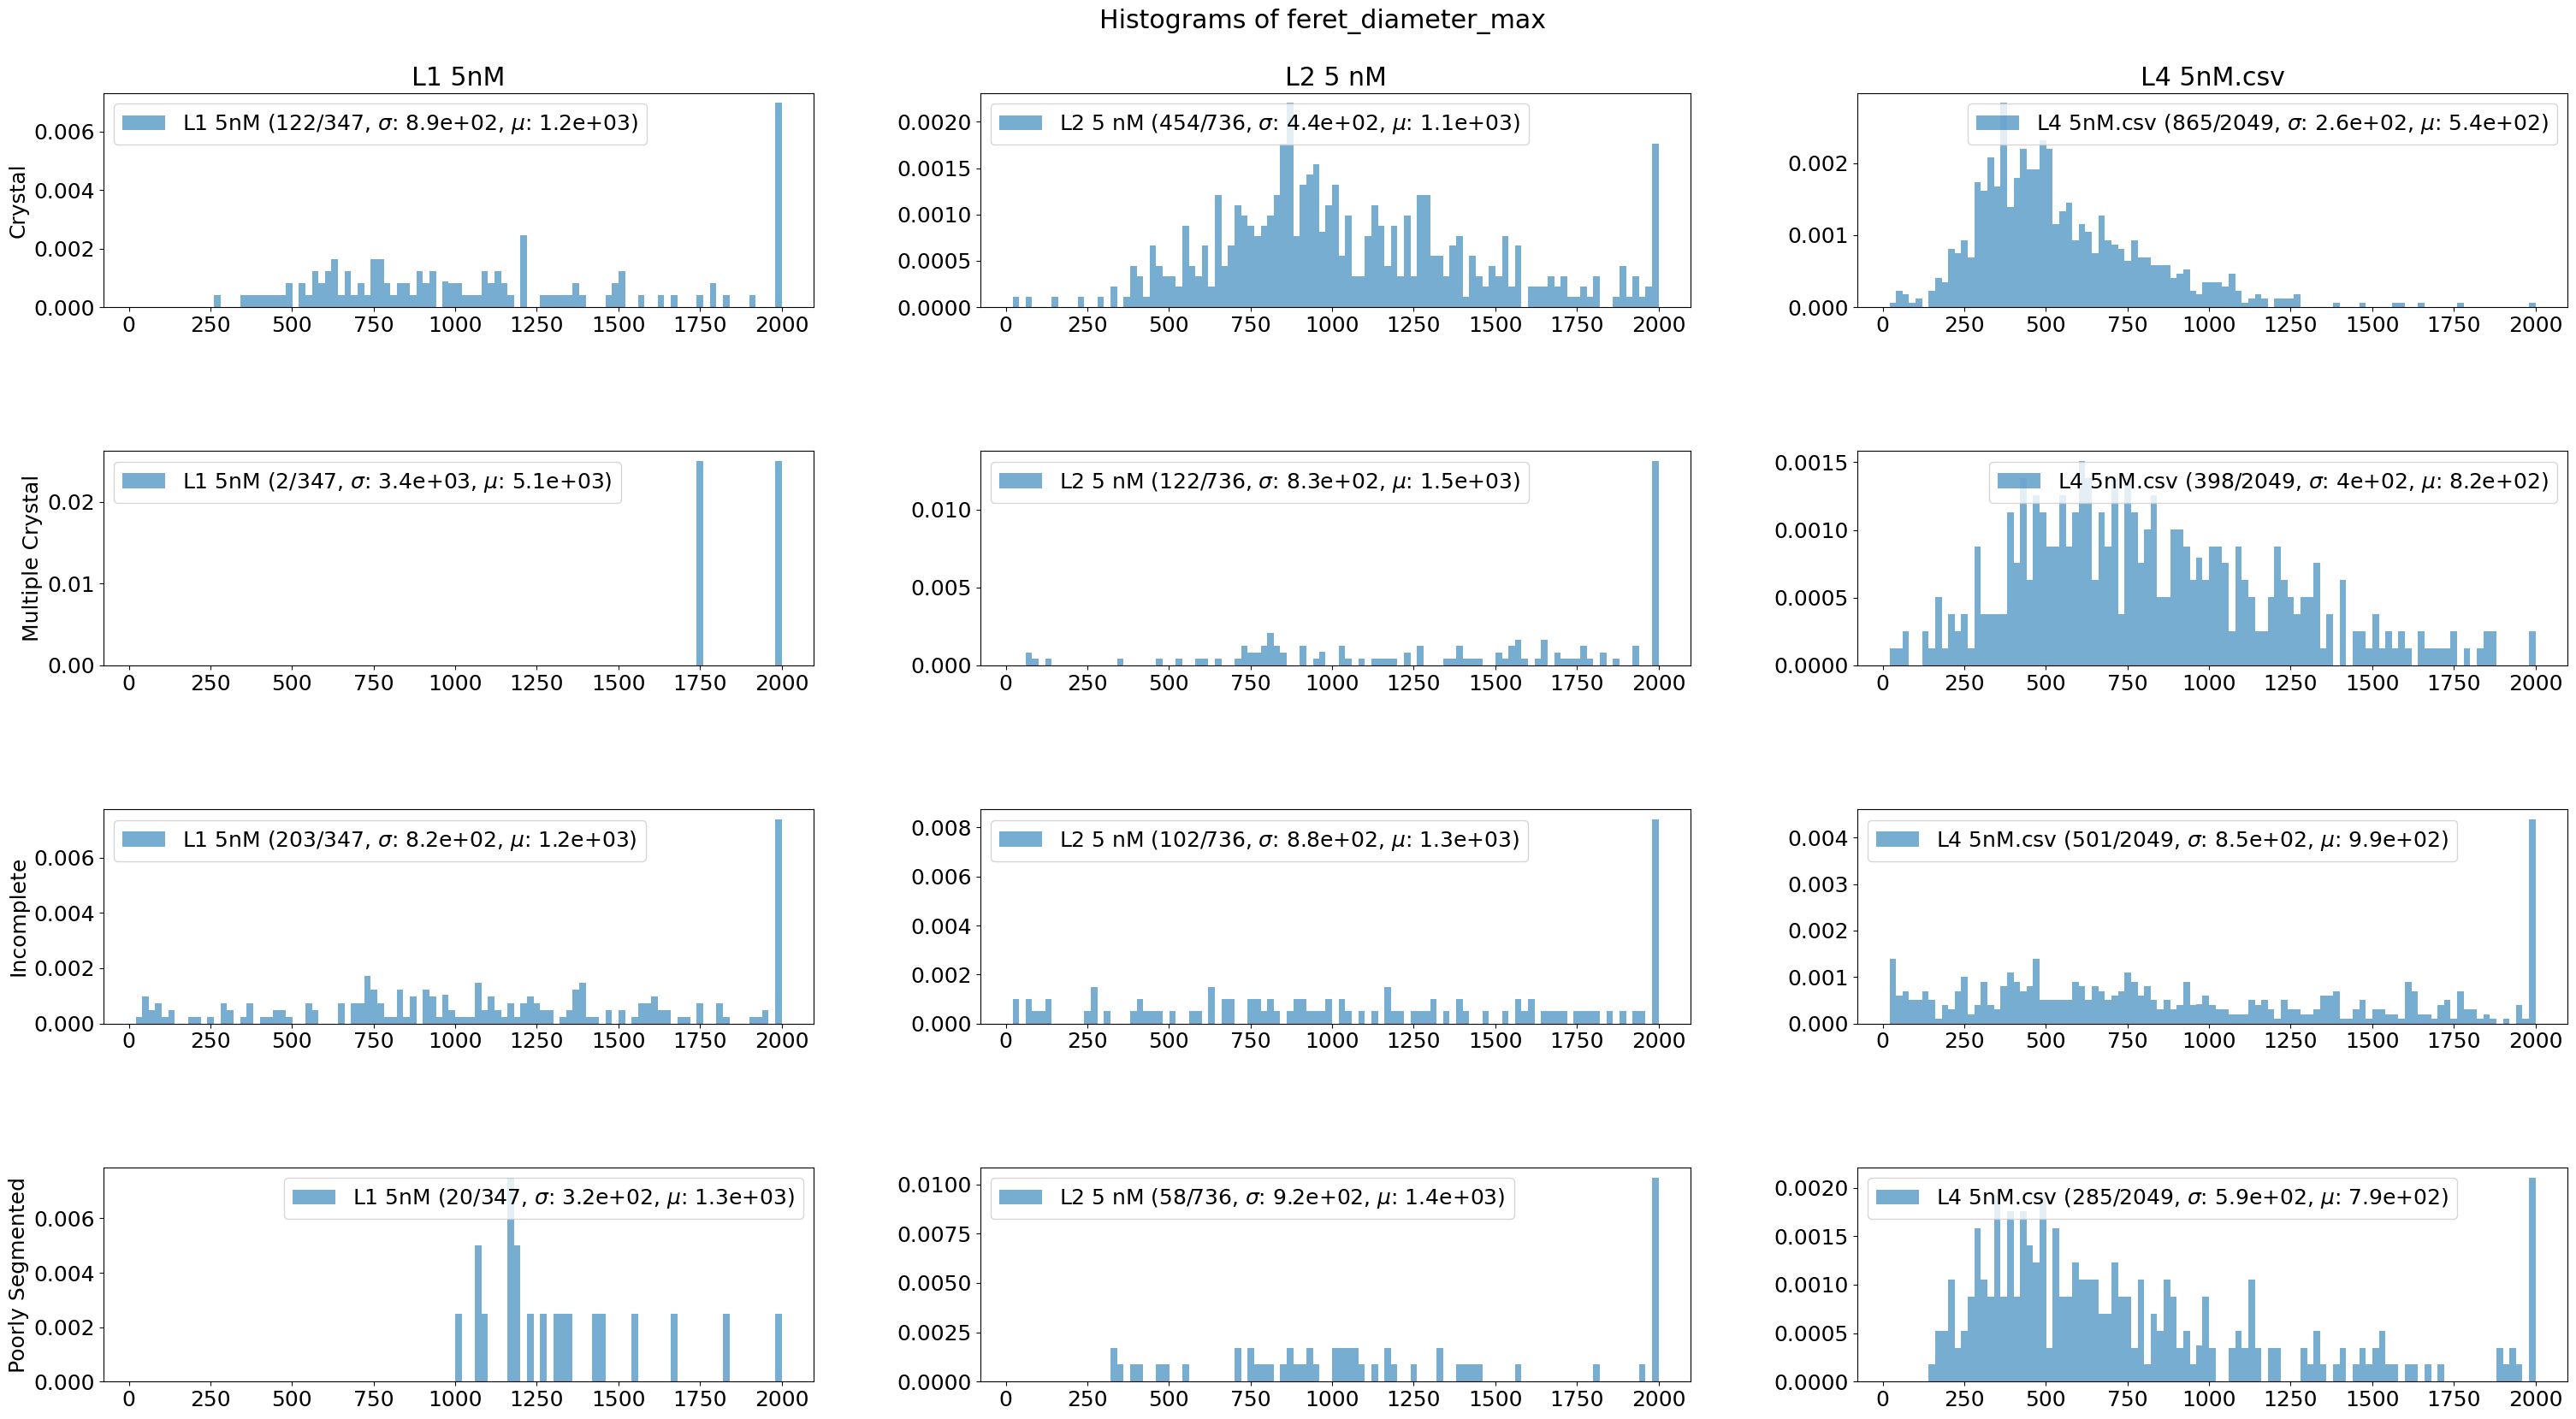

In [4]:
histogram_features = ['area','feret_diameter_max']

for histogram_feature in histogram_features:
    maxed = 2.50*10**6 if histogram_feature == 'area' else 2000
    fig, ax = plt.subplots(4, len(files),figsize = (32, 18))
    fig.tight_layout(pad=5.0)
    fig.suptitle(f'Histograms of {histogram_feature}')
    class_list = ["Crystal","Multiple Crystal","Incomplete","Poorly Segmented"]
    histogram_min = min([min(df[histogram_feature]) for df in df_exp])
    histogram_max = max([max(df[histogram_feature]) for df in df_exp])
    histogram_bins = np.round(np.linspace(histogram_min,maxed,100))
    #histogram_bins = np.append(histogram_bins,histogram_max)
    #histogram_bins = histogram_bins[1:].astype('str')
    #histogram_bins[-1] += '+'
    #print(histogram_bins)
    for ii in np.arange(len(class_list)):
        for jj,(df,file) in enumerate(list(zip(df_exp,files))):
            sub_df = df[df["Labels"] == class_list[ii]]
            x_data = sub_df[histogram_feature]
            counts = len(x_data)
            total_counts = len(df)
            sigma = np.std(x_data)
            mu = np.mean(x_data)
            ax_oi = ax[ii,jj]
            ax_oi.hist(np.clip(x_data,histogram_bins[0],histogram_bins[-1]),\
                        alpha=0.6,label=f'{file} ({counts}/{total_counts}, $\sigma$: {sigma:.2}, $\mu$: {mu:.2})'\
                        ,bins=histogram_bins,density=True)
            ax_oi.legend()
            
            # Set column title
            if ii == 0:
                ax_oi.title.set_text(file)
            if jj == 0:
                ax_oi.set_ylabel(class_list[ii])
        #ax.title.set_text(class_list[ii])
        #ax.legend()
        
        #xlabels = histogram_bins[1:].astype(str)
        #xlabels[-1] += '+'

        #N_labels = len(xlabels)
        #fig.xlim([0, maxed])
        #ax[ii].xticks(25 * np.arange(N_labels) + 12.5)
        #ax[ii].set_xticklabels(xlabels)
    plt.rcParams.update({'font.size': 18})
    fig.show()

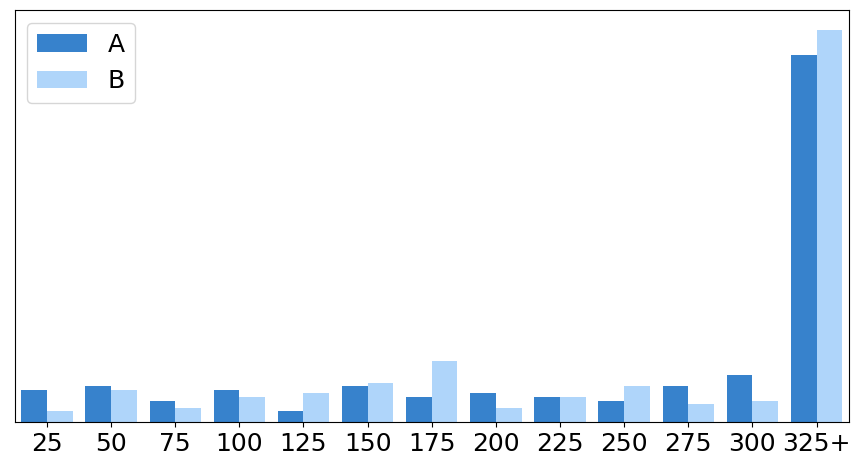

In [5]:
def plot_histogram_01():
    np.random.seed(1)
    values_A = np.random.choice(np.arange(600), size=200, replace=True)
    values_B = np.random.choice(np.arange(600), size=200, replace=True)

    bins = np.arange(0,350,25)

    fig, ax = plt.subplots(figsize=(9, 5))
    _, bins, patches = plt.hist([np.clip(values_A, bins[0], bins[-1]),
                                 np.clip(values_B, bins[0], bins[-1])],
                                # normed=1,  # normed is deprecated; replace with density
                                density=True,
                                bins=bins, color=['#3782CC', '#AFD5FA'], label=['A', 'B'])

    xlabels = bins[1:].astype(str)
    xlabels[-1] += '+'

    N_labels = len(xlabels)
    plt.xlim([0, 325])
    plt.xticks(25 * np.arange(N_labels) + 12.5)
    ax.set_xticklabels(xlabels)

    plt.yticks([])
    plt.title('')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper left')

    fig.tight_layout()
plot_histogram_01()